### Support Vector Machine
##### By MMA

In [1]:
import numpy as np

### A) Form primal SVM as a QP problem

<img src="equ/Capture11.PNG">

<img src="equ/Capture12.PNG">

##### ** $y^{(i)}$ must be multiplied to $<x^{(i)},1>$. A and b are zero!

### B) Solve SVM primal form using cvxopt.solvers.qp

We concatenate w , b and $\xi$ to a vector named Z

In [2]:
from cvxopt import matrix, solvers

In [3]:
def generate_linear_separable_data():
    # generate training data in the 2-d case
    mean1 = np.array([0, 2])
    mean2 = np.array([2, 0])
    cov = np.array([[0.8, 0.6], [0.6, 0.8]])
    X1 = np.random.multivariate_normal(mean1, cov, 100)
    y1 = np.ones(len(X1))
    X2 = np.random.multivariate_normal(mean2, cov, 100)
    y2 = np.ones(len(X2)) * -1
    return X1, y1, X2, y2


In [4]:
X1, y1, X2, y2 = generate_linear_separable_data()
X_train = np.concatenate((X1[:80], X2[:80]))
y_train = np.concatenate((y1[:80], y2[:80]))
X_test = np.concatenate((X1[80:], X2[80:]))
y_test = np.concatenate((y1[80:], y2[80:]))

In [5]:
C = 0.5
N = 160
d = 2
z_dim = N + d + 1

In [6]:

P = matrix(0, (z_dim, z_dim), 'd')
P[0, 0] = P[1, 1] = 1

In [7]:
q = matrix(0, (z_dim, 1), 'd')
for i in range(3, z_dim):
    q[i] = C

In [8]:
G = matrix(0, (2 * N, N + 2 + 1), 'd')
for i in range(N):
    G[i, 2 + 1 + i] = -1
    G[N + i, 2 + 1 + i] = -1
    G[i, 2] = -1 * y_train[i]
for i in range(N):
    for j in range(2):
        G[i, j] = X_train[i, j] * -1 * y_train[i]


In [9]:
h = matrix(0, (2 * N, 1), 'd')
for i in range(N):
    h[i] = -1


In [10]:
sol = solvers.qp(P, q, G, h)
Z_opt = sol['x']


     pcost       dcost       gap    pres   dres
 0: -3.4359e+01  1.2865e+02  9e+02  3e+00  5e+01
 1:  6.2635e+01 -5.6591e+01  1e+02  3e-01  6e+00
 2:  9.7954e+00 -2.2501e+00  1e+01  2e-02  3e-01
 3:  2.7754e+00  4.3615e-01  2e+00  3e-03  5e-02
 4:  2.0647e+00  8.9677e-01  1e+00  1e-03  2e-02
 5:  1.4984e+00  1.1503e+00  3e-01  4e-16  2e-15
 6:  1.3858e+00  1.2202e+00  2e-01  4e-16  3e-15
 7:  1.3191e+00  1.2708e+00  5e-02  4e-16  6e-16
 8:  1.2937e+00  1.2930e+00  7e-04  4e-16  2e-15
 9:  1.2933e+00  1.2933e+00  7e-06  4e-16  7e-15
10:  1.2933e+00  1.2933e+00  7e-08  4e-16  5e-15
Optimal solution found.


In [11]:
w = Z_opt[:d]
b = Z_opt[d]
y_predict = []
for i in range(40):
    y_predict.append(np.sign(np.matmul(np.transpose(w), X_test[i]) + b))

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

1.0

### C ) Why strong duality is satisfied?

The problem is a QP form thus is a convex problem. On the other hand Slatter's conditions is satisfed because for a data classified correctly but is inside margin, inequality constraint is inactive.

### D) Obtain KKT conditions for this problem.

<img src="equ/Capture.PNG">

### E) Derive dual form of SVM

Get derivative from Lagrangian obtained above :

<img src="equ/Capture5.PNG">

By substituting w and C to Lagrangian we obtain dual function g hence dual problem.

### F) Obtain optimal w,b based on $\alpha$

<img src="equ/Capture3.PNG">

Each of the samples that has $\alpha$ > 0 is on the margin , thus we solve for b using any of support vectors :

<img src="equ/Capture4.PNG">

### G) Prove that gram matrice for RBF kernel is P.S.D.

Gram matrice is symmetric thus we could prove that all of eigenvalues is non-negative. It is sufficient to investigate 2*2 matrices.

<img src="equ/Capture7.PNG">

### H ) Form dual SVM problem as a QP problem

<img src="equ/Capture10.PNG">

### I ) Implement dual form of SVM using gaussian kernel

In [13]:
def generate_non_linear_separable_data():
    mean1 = [-1, 2]
    mean2 = [1, -1]
    mean3 = [4, -4]
    mean4 = [-4, 4]
    cov = [[1.0,0.8], [0.8, 1.0]]
    X1 = np.random.multivariate_normal(mean1, cov, 50)
    X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
    y1 = np.ones(len(X1))
    X2 = np.random.multivariate_normal(mean2, cov, 50)
    X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
    y2 = np.ones(len(X2)) * -1
    return X1, y1, X2, y2

In [14]:
X1, y1, X2, y2 = generate_non_linear_separable_data()
X_train = np.concatenate((X1[:80], X2[:80]))
y_train = np.concatenate((y1[:80], y2[:80]))
X_test = np.concatenate((X1[80:], X2[80:]))
y_test = np.concatenate((y1[80:], y2[80:]))

In [15]:
diag_y = matrix(0, (N, N), 'd')
for i in range(N):
    diag_y[i, i] = y_train[i]

In [16]:
q = matrix(-1, (N, 1), 'd')

A = matrix(0, (1, N), 'd')
for i in range(N):
    A[0, i] = y_train[i]

b = matrix(0, (1, 1), 'd')

G = matrix(0, (2*N, N), 'd')
for i in range(N):
    G[i, i] = -1
    G[i + N, i] = 1


In [17]:
import math

gamma_list = [10, 50, 100, 500]
C_list = [0.01, 0.1, 0.5, 1]

for gamma in gamma_list:
    for C in C_list:
        Gram = matrix(0, (N, N), 'd')
        for i in range(N):
            for j in range(N):
                Gram[i, j] = math.exp(-gamma * (np.linalg.norm(X_train[i] - X_train[j]) ** 2))
        P = matrix(np.matmul(np.matmul(diag_y, Gram), diag_y.T))
        
        h = matrix(0, (2*N, 1), 'd')
        for i in range(N, 2*N):
            h[i, 0] = C
            
        solvers.options['show_progress'] = False
        sol = solvers.qp(P, q, G, h, A, b)
        alpha = (sol['x'])
        for i in range(N):
            if alpha[i] < 10**-7:
                alpha[i] = 0

        sv = X_train[np.argmax(alpha)]
        sv_label = y_train[np.argmax(alpha)]
        temp = 0
        for i in range(N):
            temp = temp + alpha[i] * y_train[i] * math.exp(-gamma * (np.linalg.norm(X_train[i] - sv) ** 2))
        w0 = temp - sv_label
        
        y_predict = []
        for i in range(40):
            temp = 0
            for j in range(N):
                temp = temp + alpha[j] * y_train[j] * math.exp(-gamma * (np.linalg.norm(X_train[j] - X_test[i]) ** 2))
            y_predict.append(np.sign(temp - w0))
            
        from sklearn.metrics import accuracy_score
        print("gamma : ", gamma, " ,C : ", C, "\tAccuracy : ", accuracy_score(y_test, y_predict))


gamma :  10  ,C :  0.01 	Accuracy :  0.5


gamma :  10  ,C :  0.1 	Accuracy :  0.5


gamma :  10  ,C :  0.5 	Accuracy :  0.85


gamma :  10  ,C :  1 	Accuracy :  0.95


gamma :  50  ,C :  0.01 	Accuracy :  0.5


gamma :  50  ,C :  0.1 	Accuracy :  0.5


gamma :  50  ,C :  0.5 	Accuracy :  0.525


gamma :  50  ,C :  1 	Accuracy :  0.9


gamma :  100  ,C :  0.01 	Accuracy :  0.5


gamma :  100  ,C :  0.1 	Accuracy :  0.5


gamma :  100  ,C :  0.5 	Accuracy :  0.525


gamma :  100  ,C :  1 	Accuracy :  0.9


gamma :  500  ,C :  0.01 	Accuracy :  0.5


gamma :  500  ,C :  0.1 	Accuracy :  0.5


gamma :  500  ,C :  0.5 	Accuracy :  0.5


gamma :  500  ,C :  1 	Accuracy :  0.625


In [20]:
import matplotlib.pyplot as plt

COLORS = ['red', 'blue']


def plot_data_with_labels(x, y):
    unique = np.unique(y)
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        plt.scatter(x_sub[:, 0], x_sub[:, 1], c=COLORS[li])
    plt.show()


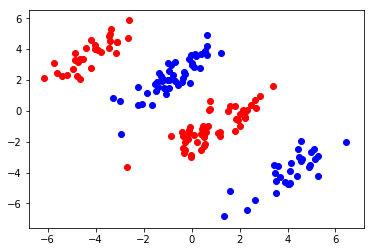

In [21]:
plot_data_with_labels(X_train, y_train)